In [1]:
from DeepStorm.model import Model
from DeepStorm.Layers.conv import Conv2d
from DeepStorm.Layers.batch_normalization import BatchNorm2d
from DeepStorm.Layers.pooling import MaxPool2d
from DeepStorm.Layers.flatten import Flatten
from DeepStorm.Layers.dropout import Dropout
from DeepStorm.Layers.linear import Linear
from DeepStorm.Activations.relu import ReLU
from DeepStorm.Activations.softmax import SoftMax
from DeepStorm.Losses.cross_entropy import CrossEntropyLoss
from DeepStorm.Optimizers.adam import Adam

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

## Example1: Feed Forward Neural Network (Mnist Dataset)

In [16]:
input_folder_path = "Data/MNIST/"
train_df = pd.read_csv(f"{input_folder_path}train.csv")[:]
test_df = pd.read_csv(f"{input_folder_path}test.csv")

train_labels = train_df['label'].values
train_images = (train_df.iloc[:, 1:].values).astype('float32')
test_images = (test_df.iloc[:, :].values).astype('float32')

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels,
                                                                      stratify=train_labels, random_state=123,
                                                                      test_size=0.20)
train_images = train_images.reshape(train_images.shape[0], 28 *28)
val_images = val_images.reshape(val_images.shape[0], 28 * 28)
test_images = test_images.reshape(test_images.shape[0], 28 * 28)

train_images = train_images/255.0
val_images = val_images/255.0
test_images = test_images/255.0

classes = 10

train_labels = train_labels.reshape(-1)
train_labels = np.eye(classes)[train_labels]
val_labels = val_labels.reshape(-1)
val_labels = np.eye(classes)[val_labels]

(33600,)
(33600,)


In [3]:
layers = [
    Linear(in_features=28*28, out_features=256),
    ReLU(),
    Linear(in_features=256, out_features=128),
    ReLU(),
    Linear(in_features=128, out_features=64),
    ReLU(),
    Linear(in_features=64, out_features=10),
    SoftMax(),
]

model = Model(layers)

In [4]:
batch_size = 64
model.compile(optimizer=Adam(learning_rate=5e-3, mu=0.98, rho=0.999), loss=CrossEntropyLoss(),
              batch_size=batch_size, metrics=['accuracy'])

In [5]:
epochs = 4
history = model.fit(x_train=train_images, y_train=train_labels,
                    x_val=val_images, y_val=val_labels, epochs=epochs)

Epoch 1: 


Train loss: 21.13
Train accuracy: 0.90
Val loss: 10.43
Val accuracy: 0.95

Epoch 2: 
Train loss: 8.77
Train accuracy: 0.96
Val loss: 8.51
Val accuracy: 0.96

Epoch 3: 
Train loss: 7.11
Train accuracy: 0.97
Val loss: 10.25
Val accuracy: 0.96

Epoch 4: 
Train loss: 5.72
Train accuracy: 0.97
Val loss: 9.33
Val accuracy: 0.96



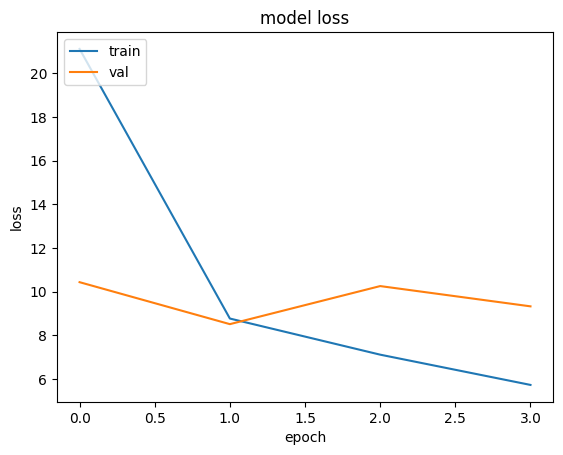

In [6]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

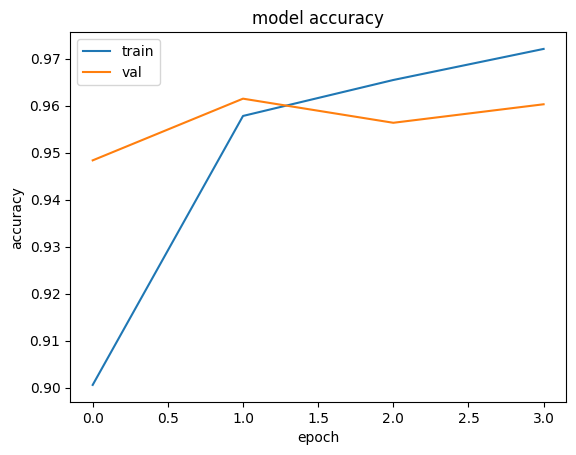

In [7]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Example2: Convolutional Neural Network (Cifar-10 Dataset)

In [8]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

out = unpickle("Data/cifar-10-python/cifar-10-batches-py/data_batch_1")

SAMPLE_SIZE = 1500
classes = 10
x = out[b'data'].reshape(10000, 3, 32, 32)[:SAMPLE_SIZE]
y = np.array(out[b'labels'])[:SAMPLE_SIZE]

x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, random_state=123, test_size=0.20)

x_train = x_train/255.0
x_val = x_val/255.0

y_train = np.eye(classes)[y_train]
y_val = np.eye(classes)[y_val]

In [9]:
layers = [
    Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding="same"),
    BatchNorm2d(16),
    ReLU(),
    MaxPool2d(kernel_size=2, stride=2),
    Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding="same"),
    BatchNorm2d(32),
    ReLU(),
    MaxPool2d(kernel_size=2, stride=2),
    Flatten(),
    Linear(in_features=32*8*8, out_features=256),
    ReLU(),
    # Dropout(0.5),
    Linear(in_features=256, out_features=10),
    SoftMax(),
]

model = Model(layers)

In [10]:
model.compile(optimizer=Adam(learning_rate=5e-3, mu=0.98, rho=0.999), loss=CrossEntropyLoss(), batch_size=32, metrics=['accuracy'])

In [11]:
history = model.fit(x_train=x_train, y_train=y_train, x_val=x_val, y_val=y_val, epochs=10)

Epoch 1: 
Train loss: 397.44
Train accuracy: 0.16
Val loss: 309.87
Val accuracy: 0.26

Epoch 2: 
Train loss: 244.38
Train accuracy: 0.25
Val loss: 195.74
Val accuracy: 0.24

Epoch 3: 
Train loss: 94.93
Train accuracy: 0.21
Val loss: 72.28
Val accuracy: 0.18

Epoch 4: 
Train loss: 71.58
Train accuracy: 0.16
Val loss: 69.68
Val accuracy: 0.18

Epoch 5: 
Train loss: 66.73
Train accuracy: 0.21
Val loss: 66.73
Val accuracy: 0.19

Epoch 6: 
Train loss: 62.82
Train accuracy: 0.26
Val loss: 67.15
Val accuracy: 0.16

Epoch 7: 
Train loss: 60.75
Train accuracy: 0.27
Val loss: 65.76
Val accuracy: 0.19

Epoch 8: 
Train loss: 58.96
Train accuracy: 0.30


In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()